In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df =  pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['BMI'] = df['weight']/((df['height']/100)**2)
df['overweight']= [1 if x > 25 else 0 for x in df.BMI]
df = df.drop(columns=['BMI'])


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = [0 if x == 1 else 1 for x in df.cholesterol]
df['gluc'] = [0 if x == 1 else 1 for x in df.gluc]

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat= pd.melt(df  , 'cardio')


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat[(df_cat['variable'].isin(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))]

    # Draw the catplot with 'sns.catplot()'
    
    fig = sns.catplot( data=df_cat , x='variable', legend = True,
            kind='count' ,hue='value', col='cardio' , order=['active','alco','cholesterol', 'gluc',   'overweight', 'smoke']).set_axis_labels("variable", "total").fig



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    amask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 5))
    #fig = plt.gcf()
    
    
    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(corr,
            cmap='rocket',
            linewidth=1,
            linecolor='white',
            mask=amask,
            vmax=0.3,
            cbar_kws = {'shrink':0.5},
            annot=True, fmt=".1f", annot_kws ={'fontsize':8},
            square=True
            
            #center=0.08
           )
    #fig.set_size_inches(18.5, 10.5)
    fig = fig.figure
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


In [10]:
# Add 'overweight' column
df =  pd.read_csv("medical_examination.csv")
df['BMI'] = df['weight']/((df['height']/100)**2)
df['overweight']= [1 if x > 25 else 0 for x in df.BMI]
df = df.drop(columns=['BMI'])
df['cholesterol'] = [0 if x == 1 else 1 for x in df.cholesterol]
df['gluc'] = [0 if x == 1 else 1 for x in df.gluc]
#df_cat= pd.melt(df , id_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat= pd.melt(df  , 'cardio')

df_cat = df_cat[(df_cat['variable'].isin(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))]
#df_cat = df_cat.rename(columns={'value':'total'})
#df.info()
#df_cat.info()

df.head() , df_cat.head()

#df['cholesterol'][(df['cholesterol'] ==1)] = 0
#df['cholesterol'][(df['cholesterol'] !=0)] = 1
# df['gluc'][(df['gluc'] ==1)] = 0
# df['gluc'][(df['gluc'] !=0)] = 1
#sns.countplot(y="variable" , data=df_cat )

#sns.catplot(x="cardio", y="smoke", hue="overweight",            col="cholesterol", aspect=.7,            kind="swarm", data=df_cat)

(   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            0     0      0   
 1   1  20228       1     156    85.0    140     90            1     0      0   
 2   2  18857       1     165    64.0    130     70            1     0      0   
 3   3  17623       2     169    82.0    150    100            0     0      0   
 4   4  17474       1     156    56.0    100     60            0     0      0   
 
    alco  active  cardio  overweight  
 0     0       1       0           0  
 1     0       1       1           1  
 2     0       0       1           0  
 3     0       1       1           1  
 4     0       0       0           0  ,
         cardio     variable  value
 490000       0  cholesterol    0.0
 490001       1  cholesterol    1.0
 490002       1  cholesterol    1.0
 490003       1  cholesterol    0.0
 490004       0  cholesterol    0.0)

In [180]:
sns.set_style('white')
sns.catplot?

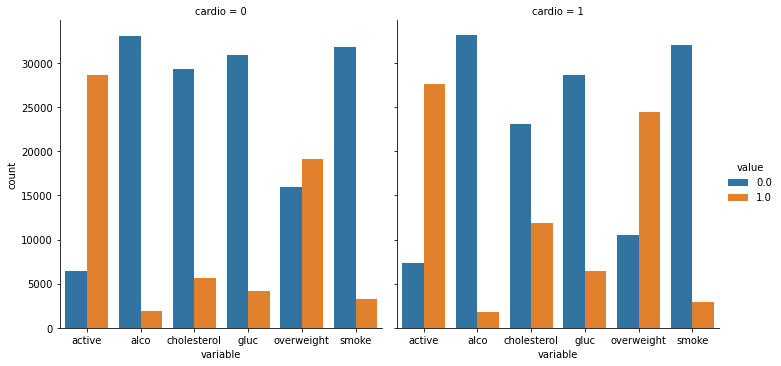

In [33]:
sns.catplot?
fig = sns.catplot( data=df_cat , x='variable',
            kind='count' ,hue='value', col='cardio' , order=['active','alco','cholesterol', 'gluc',   'overweight', 'smoke']
                
                 )

  

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003154 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022609 -0.081515  0.053684  0.020764   
gender       0.003154 -0.022609  1.000000  0.498221  0.155115  0.005985   
height      -0.003038 -0.081515  0.498221  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155115  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.005985  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015195  0.006150  0.043710  0.016086   
cholesterol  0.005290  0.129697 -0.034729 -0.048532  0.137981  0.024730   
gluc         0.002844  0.088099 -0.018318 -0.019400  0.120407  0.012886   
smoke       -0.003699 -0.047633  0.337664  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170682  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005991 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

NameError: name 'trimask' is not defined

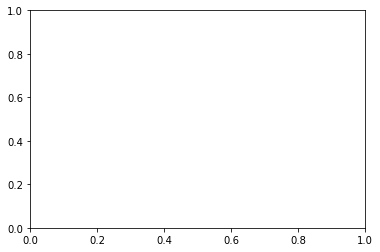

In [18]:
# Clean the data
df_heat = df.dropna()
#corr = df_heat.corr(method='spearman')
corr = df_heat.corr()
print(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(1, 1)
fig = sns.heatmap(corr,
            cmap='rocket',
            linewidth=1,
            linecolor='white',
            mask=trimask,
            vmin=-0.8, vmax=0.24,
            annot=True, fmt=".1f", annot_kws ={'fontsize':8},
            square=True
            
            #center=0.08
           
           ).fig

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df =  pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['BMI'] = df['weight']/((df['height']/100)**2)
df['overweight']= [1 if x > 25 else 0 for x in df.BMI]
df = df.drop(columns=['BMI'])
df['cholesterol'] = [0 if x == 1 else 1 for x in df.cholesterol]
df['gluc'] = [0 if x == 1 else 1 for x in df.gluc]

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat= pd.melt(df  , 'cardio')


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat[(df_cat['variable'].isin(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))]

    fig = graph.fig 
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot( data=df_cat , x='variable', legend = True,
            kind='count' ,hue='value', col='cardio' , order=['active','alco','cholesterol', 'gluc',   'overweight', 'smoke'])


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df.dropna()

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(1, 1)

    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(corr,
            cmap='rocket',
            linewidth=1,
            linecolor='white',
            mask=mask,
            vmin=-0.8, vmax=0.24,
            annot=True, fmt=".1f", annot_kws ={'fontsize':8},
            square=True
            
            #center=0.08
           
           )


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


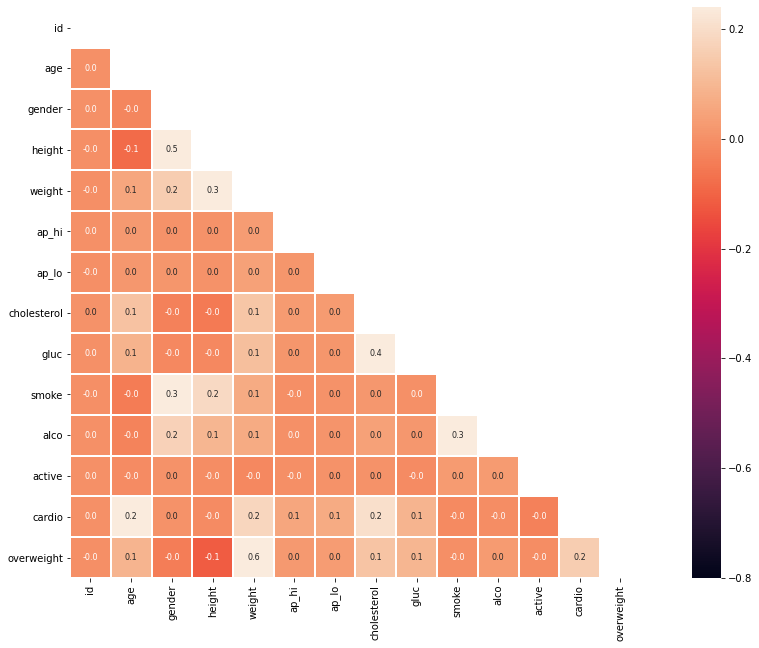

In [20]:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    df_heat = df.dropna()

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    #fig, ax = plt.subplots(1, 1)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    
    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(corr,
            cmap='rocket',
            linewidth=1,
            linecolor='white',
            mask=mask,
            vmin=-0.8, vmax=0.24,
            annot=True, fmt=".1f", annot_kws ={'fontsize':8},
            square=True
            
            #center=0.08
           )

